In [3]:
import pandas as pd

from Bio.PDB import *
from Bio.PDB.PDBParser import PDBParser
import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning
warnings.simplefilter('ignore', PDBConstructionWarning)

import matplotlib
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

## Overview

- [Function Definitions](#Function-Definitions)
    - [Residue Distance Function](#Residue-Distance-Function)
    - [Distance Matrix Function](#Distance-Matrix-Function)
    - [Distance Matrix Plot Function](#Distance-Matrix-Plot-Function)
- [Calculate Distance Matrix](#Calculate-Distance-Matrix)
- [Actin x2 Domain Plot](#Actin-x2-domain)

### File Inputs

In [4]:
pdbID = '2zwh'
pdb_file = '/home/kmm5/actin/factin/oda9.pdb'

[Back to Overview](#Overview)

In [5]:
#Files for PDB contacts
pdb_monomer = "./sbm/pdb_maps_8A/cutoff/all_pdb_monomer_8A.contacts"
pdb_interface = "./sbm/pdb_maps_8A/cutoff/all_pdb_interface_8A.contacts"

dist_matrix_file = '/home/kmm5/actin/sbm/distance_matrix_oda9.txt'

dca_pairs_file = './plmDCA/cytoplasm/from_actin-actin_subseq/dca12A_inter_actin2.contacts'

#Load PDB contacts
pdb_mon_pair_i, pdb_mon_pair_j = np.loadtxt(pdb_monomer, unpack=True)
pdb_inter_pair_i, pdb_inter_pair_j = np.loadtxt(pdb_interface, unpack=True)

d_pair_i, d_pair_j = np.loadtxt(dca_pairs_file, unpack=True)


## Calculate Distance Matrix

[Back to Overview](#Overview)

In [41]:
distanceMatrixCalc(pdb_file, chain_letter='E')

Total pairs: 1125000



## Actin x2 domain

[Back to Overview](#Overview)

<IPython.core.display.Javascript object>


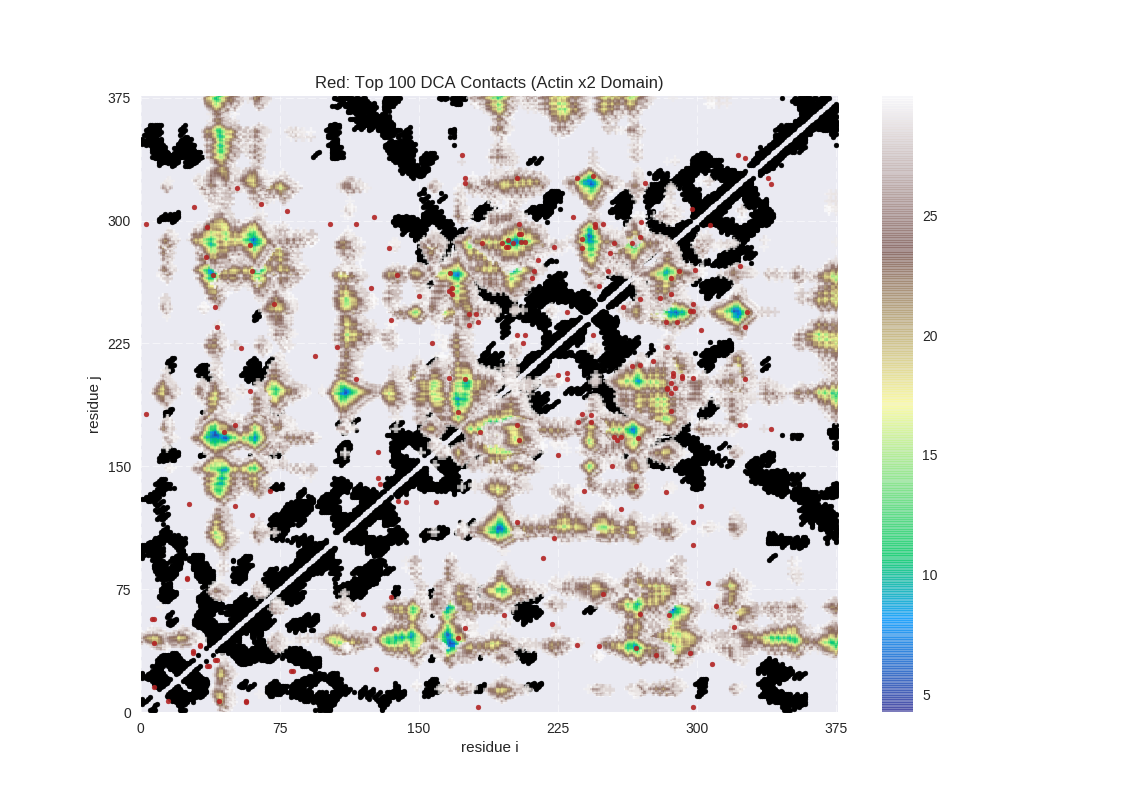

/home/kmm5/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1124928 but corresponding boolean dimension is 1125000


In [46]:
plotDistanceMatrix(dist_matrix_file, cutoff=30, N=100)

[Back to Overview](#Overview)

## Function Definitions

## Residue Distance Function

[Back to Overview](#Overview)

In [36]:
def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    
    return np.sqrt(np.sum(diff_vector * diff_vector))

In [37]:
# def calc_dist_matrix(chain_one, chain_two) :
#     """Returns a matrix of C-alpha distances between two chains"""
# #     answer = np.zeros((len(chain_one), len(chain_two)), np.float)
#     for row, residue_one in enumerate(chain_one) :
#         for col, residue_two in enumerate(chain_two) :
#             answer = calc_residue_dist(residue_one, residue_two)
# #             answer[row, col] = calc_residue_dist(residue_one, residue_two)

#     return row, col, answer

## Distance Matrix Function

[Back to Overview](#Overview)

In [38]:
def distanceMatrixCalc(pdb_file, chain_letter):
    p = PDBParser(PERMISSIVE=1)
    structure = p.get_structure(pdbID, pdb_file)
    model = structure[0]
    chain_I = model[chain_letter]
    chainsJ = structure.get_chains()

    target = open('/home/kmm5/actin/sbm/distance_matrix_oda9.txt', 'w')

    # Initial parameters
    valid_predictions = 0
    missing_res = 0

    for chain_J in chainsJ:
        if (chain_J != chain_I):
            for row, res_i in enumerate(chain_I) :
                for col, res_j in enumerate(chain_J) :
                    dist = calc_residue_dist(res_i, res_j)
                    valid_predictions = valid_predictions + 1                  
                    target.write("%d\t%d\t%f\n"% (row+1, col+1, dist))

    print "Total pairs: %d\n" % valid_predictions

## Distance Matrix Plot Function

[Back to Overview](#Overview)

In [44]:
def plotDistanceMatrix(input_file, cutoff, N):
    
    pair_i, pair_j, dist = np.loadtxt(input_file, unpack=True)
    fig = plt.figure(figsize=(11.25,8), dpi=100)

    #PDB Plots

    plt.scatter(pdb_mon_pair_i, pdb_mon_pair_j, marker='.', label="PDB Monomer", color="black")
    plt.scatter(pdb_mon_pair_j, pdb_mon_pair_i, marker='.', label="PDB Monomer", color="black")

    plt.scatter(pair_i[dist<cutoff], pair_j[dist<cutoff], 
                c=pdb_dist[dist<cutoff], marker='+', cmap=('terrain'), alpha=0.6)
    plt.colorbar()
    # plt.scatter(pdb_inter_pair_i, pdb_inter_pair_j, marker='o', alpha=0.3, 
    #             label="PDB Interfacial", color="orange")
    # plt.scatter(pdb_inter_pair_j, pdb_inter_pair_i, marker='o', alpha=0.3, 
    #             label="PDB Interfacial", color="orange")

    plt.scatter(d_pair_i[0:N], d_pair_j[0:N], marker='.', color="firebrick", alpha=0.9)
    plt.scatter(d_pair_j[0:N], d_pair_i[0:N], marker='.', color="firebrick", alpha=0.9)

    plt.xlim(0,376)
    plt.xticks(np.linspace(0,375, num=6))
    plt.ylim(0,376)
    plt.yticks(np.linspace(0,375, num=6))
    plt.xlabel("residue i")
    plt.ylabel("residue j")
    plt.title("Red: Top %d DCA Contacts (Actin x2 Domain)" % N)
    plt.grid(linestyle='--', linewidth=0.4)

[Back to Overview](#Overview)